In [17]:
import os
import pandas as pd

In [18]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [19]:
bscore=pd.read_csv('M_BDScore.csv')

In [20]:
bscore

,Participant,Block Design Raw Score
0,C001,36
1,C003,58
2,C006,42
3,C008,34
4,C009,24
5,C012,54
6,C013,48
7,C016,39
8,C017,36
9,C020,30


In [21]:
final_df=pd.read_csv('PositionDistance_ComplexPie.csv')

In [22]:
final_df = pd.merge(bscore, final_df, on='Participant', how='inner')
final_df

,Participant,Block Design Raw Score,Chest,HeadCamera,LeftElbow,LeftShoulder,MotionControllerLeft,MotionControllerRight,RightElbow,RightShoulder
0,C001,36,3395.496127,4873.394828,4943.053122,4723.892731,5571.116724,11350.784753,0.000000,0.000000
1,C003,58,2441.226143,3706.550475,5360.292055,3692.937327,5354.438631,9325.253301,5944.739917,4504.208680
2,C006,42,0.000000,13718.031017,0.000000,0.000000,11931.234830,13994.063894,0.000000,0.000000
3,C008,34,5700.541398,7249.311815,8098.794354,7629.508538,8208.691009,17023.989966,13714.711774,10190.067385
4,C009,24,6033.585268,8253.252412,7296.033427,7572.354870,7315.455306,17737.162340,13271.209674,9907.909661
5,C012,54,4288.495977,4712.594053,6729.454648,6143.365294,7840.153705,14035.889455,9658.841557,6739.413823
6,C013,48,6519.554198,7920.065874,10220.217748,8874.677785,12700.446525,13452.025244,10296.428585,8498.068950
7,C016,39,5183.757477,7257.163993,8069.332124,7611.329034,9755.215507,13052.393533,10385.884082,8028.321522
8,C017,36,2594.463613,5302.547139,4429.981578,4482.371709,6464.035372,12528.308020,8977.525132,7180.262095
9,C020,30,4712.449120,9261.042902,8528.845238,7375.464025,9747.469647,13801.274714,11725.719015,8014.142790


#### Scatter plot between block design scores and total distance (Trackers)

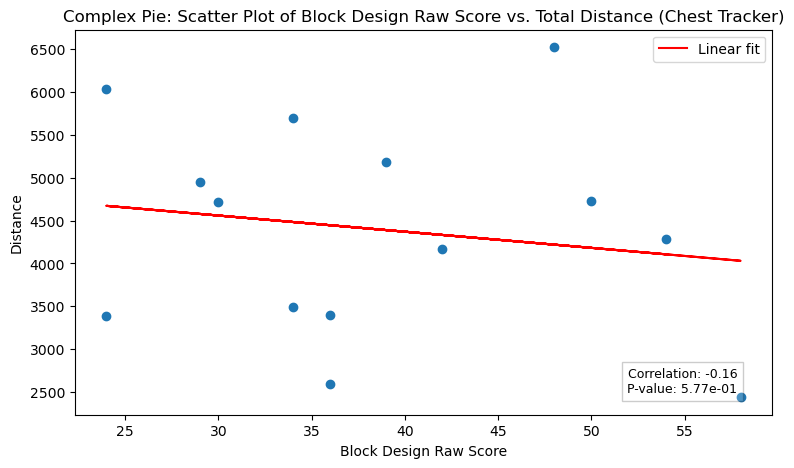

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

chest_df = final_df[final_df['Chest'] != 0]
correlation, p_value = spearmanr(chest_df['Block Design Raw Score'], chest_df['Chest'])
plt.figure(figsize=(9,5))
plt.scatter(chest_df['Block Design Raw Score'], chest_df['Chest'])

# Calculate linear fit
slope, intercept = np.polyfit(chest_df['Block Design Raw Score'], chest_df['Chest'], 1)
fit_line = slope * chest_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(chest_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Chest Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '1 CP_DistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

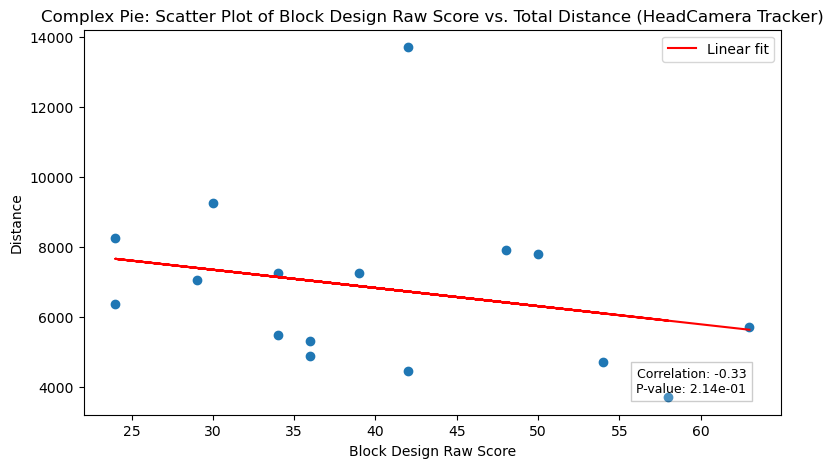

In [24]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['HeadCamera'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['HeadCamera'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['HeadCamera'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (HeadCamera Tracker)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '2 CP_DistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

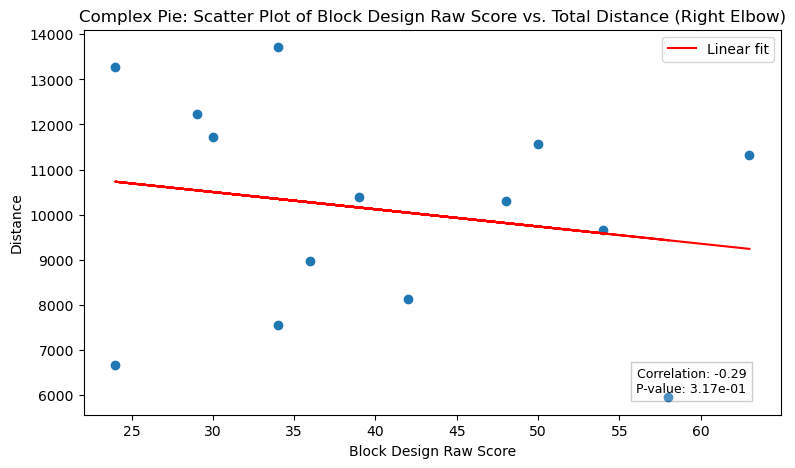

In [31]:
rightelbow_df = final_df[final_df['RightElbow'] != 0]
correlation, p_value = spearmanr(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow'])
plt.figure(figsize=(9,5))
plt.scatter(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow'])


slope, intercept = np.polyfit(rightelbow_df['Block Design Raw Score'], rightelbow_df['RightElbow'], 1)
fit_line = slope * rightelbow_df['Block Design Raw Score'] + intercept
plt.plot(rightelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '3 CP_DistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

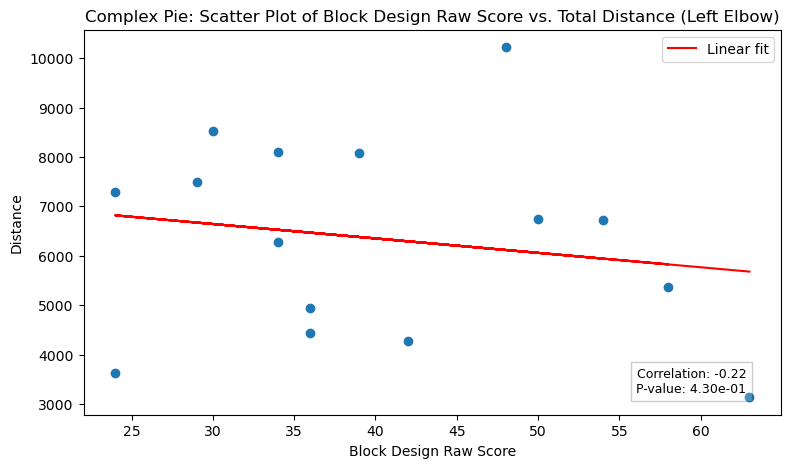

In [32]:
leftelbow_df = final_df[final_df['LeftElbow'] != 0]
correlation, p_value = spearmanr(leftelbow_df['Block Design Raw Score'], leftelbow_df['LeftElbow'])
plt.figure(figsize=(9,5))
plt.scatter(leftelbow_df['Block Design Raw Score'], leftelbow_df['LeftElbow'])


slope, intercept = np.polyfit(leftelbow_df['Block Design Raw Score'], leftelbow_df['LeftElbow'], 1)
fit_line = slope * leftelbow_df['Block Design Raw Score'] + intercept
plt.plot(leftelbow_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Elbow)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '4 CP_DistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

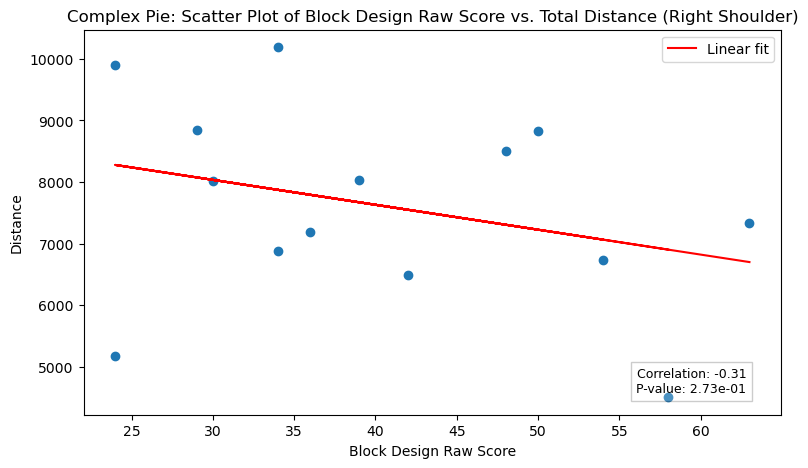

In [33]:
rightshdr_df = final_df[final_df['RightShoulder'] != 0]
correlation, p_value = spearmanr(rightshdr_df['Block Design Raw Score'], rightshdr_df['RightShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(rightshdr_df['Block Design Raw Score'], rightshdr_df['RightShoulder'])


slope, intercept = np.polyfit(rightshdr_df['Block Design Raw Score'], rightshdr_df['RightShoulder'], 1)
fit_line = slope * rightshdr_df['Block Design Raw Score'] + intercept
plt.plot(rightshdr_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Right Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '5 CP_DistanceRightShoulder.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

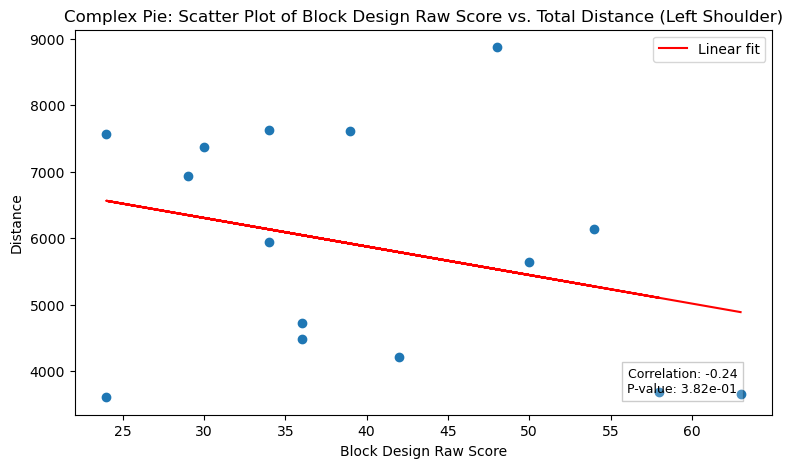

In [34]:
leftshdr_df = final_df[final_df['LeftShoulder'] != 0]
correlation, p_value = spearmanr(leftshdr_df['Block Design Raw Score'], leftshdr_df['LeftShoulder'])
plt.figure(figsize=(9,5))
plt.scatter(leftshdr_df['Block Design Raw Score'], leftshdr_df['LeftShoulder'])


slope, intercept = np.polyfit(leftshdr_df['Block Design Raw Score'], leftshdr_df['LeftShoulder'], 1)
fit_line = slope * leftshdr_df['Block Design Raw Score'] + intercept
plt.plot(leftshdr_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Left Shoulder)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '6 CP_DistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

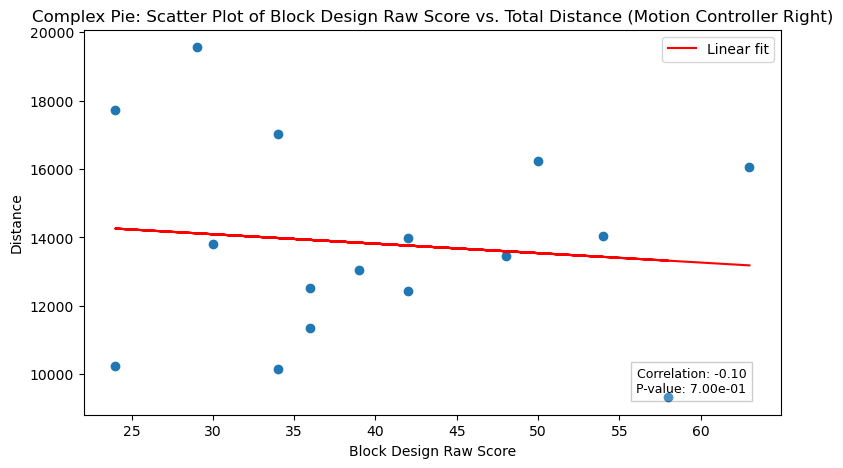

In [35]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerRight'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerRight'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Right)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '7 CP_DistanceMotionContRight.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

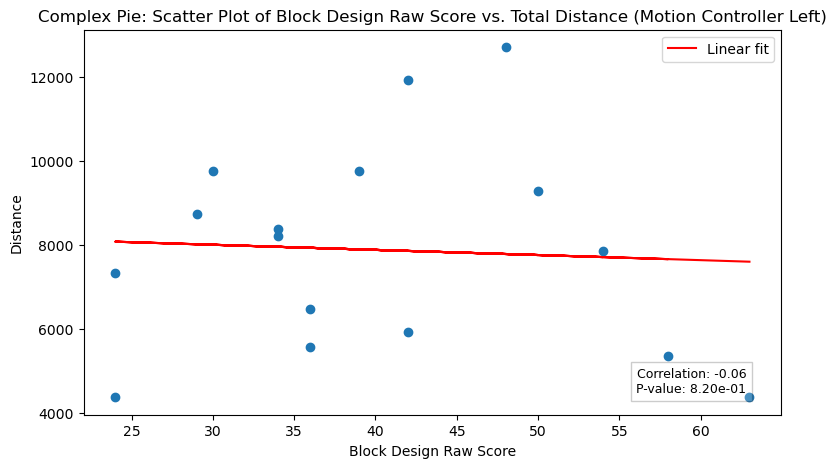

In [36]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'])

slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['MotionControllerLeft'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')
plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Total Distance (Motion Controller Left)')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '8 CP_DistanceMotionContLeft.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()